In [1]:
import pandas as pd
import numpy as np
import os
import names
import json
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

/home/phil/.pyenv/versions/3.7.2/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
nrows = [1,2,10,50,100,500,1000, 5000, 10000, 50000, 100000, 500000,1000000, 5000000, 10000000, 50000000]
ncols = [1,2,4,8,16]

## 1 a : Size random gaussian numbers

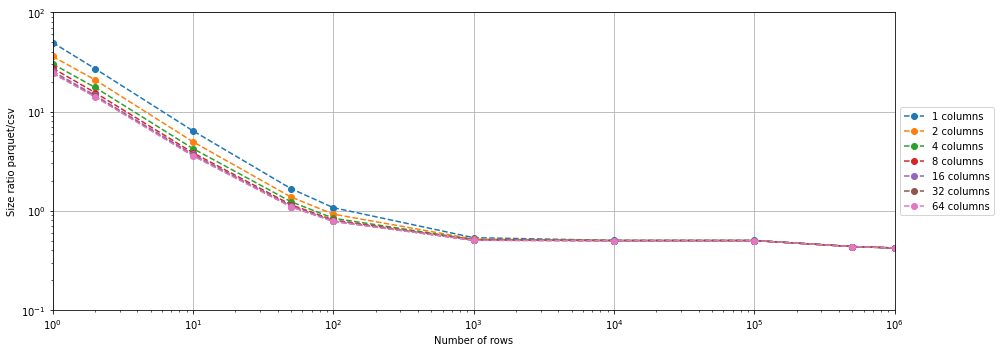

In [4]:
with open('../data/size.json', "r") as f:
    size_ratio = json.load(f)


ncols = [1,2,4,8,16,32,64]
nrows = [1,2,10,50,100,1000, 10000, 100000, 500000, 1000000]
fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, size_ratio[f'{c}'], 'o--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Size ratio parquet/csv')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1,100])
ax.set_xlim([1.0,1e6])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
fig.savefig("../figs/en_size_1.png", dpi=fig.dpi)

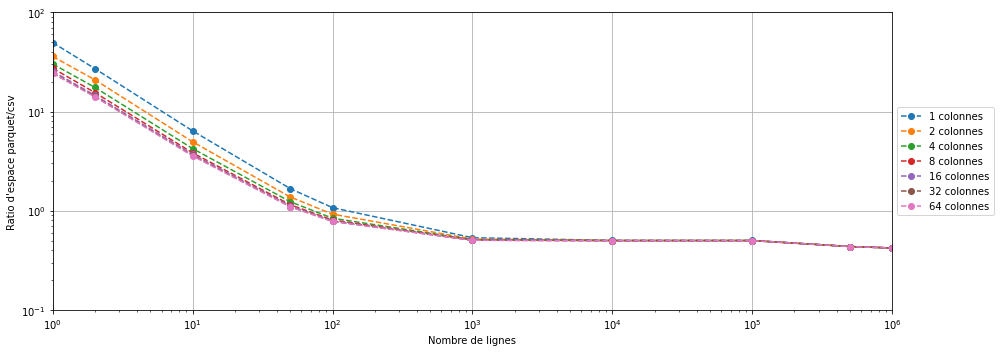

In [5]:
with open('../data/size.json', "r") as f:
    size_ratio = json.load(f)


ncols = [1,2,4,8,16,32,64]
nrows = [1,2,10,50,100,1000, 10000, 100000, 500000, 1000000]
fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, size_ratio[f'{c}'], 'o--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Nombre de lignes')
ax.set_ylabel("Ratio d'espace parquet/csv")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1,100])
ax.set_xlim([1.0,1e6])
ax.grid(True)
ax.legend([f"{c} colonnes" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
fig.savefig("../figs/fr_size_1.png", dpi=fig.dpi)

## 1 b: speed random gaussian numbers

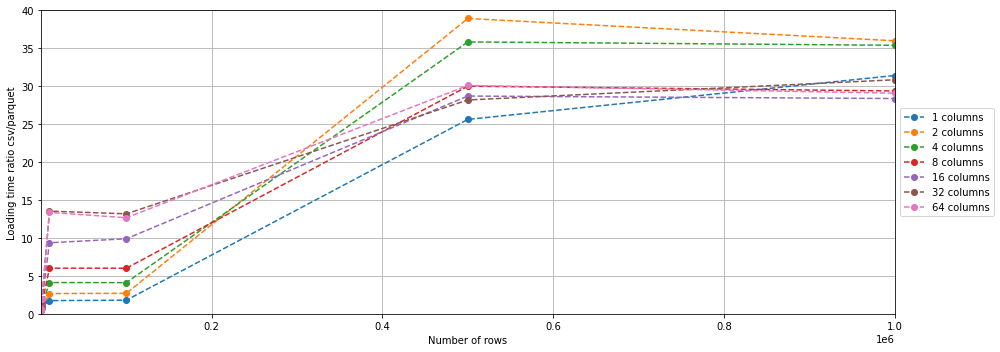

In [18]:
ncols = [1,2,4,8,16,32,64]
nrows = [1,2,10,50,100,1000, 10000, 100000, 500000, 1000000]

with open('../data/speed.json', "r") as f:
    speed_ratio = json.load(f)


fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, speed_ratio[f'{c}'], 'o--')

ax.set_xlabel('Number of rows')
ax.set_ylabel('Loading time ratio csv/parquet')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0,40])
ax.set_xlim([1,1e6])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()
fig.savefig("../figs/en_time_ratio.png", dpi=fig.dpi)


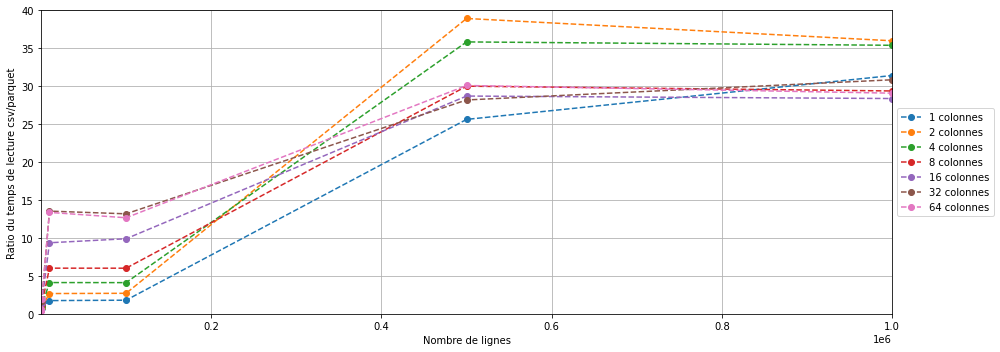

In [19]:
fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, speed_ratio[f'{c}'], 'o--')

ax.set_xlabel('Nombre de lignes')
ax.set_ylabel('Ratio du temps de lecture csv/parquet')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0,40])
ax.set_xlim([1,1e6])
ax.grid(True)
ax.legend([f"{c} colonnes" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()
fig.savefig("../figs/fr_time_ratio.png", dpi=fig.dpi)


## 2a Names size

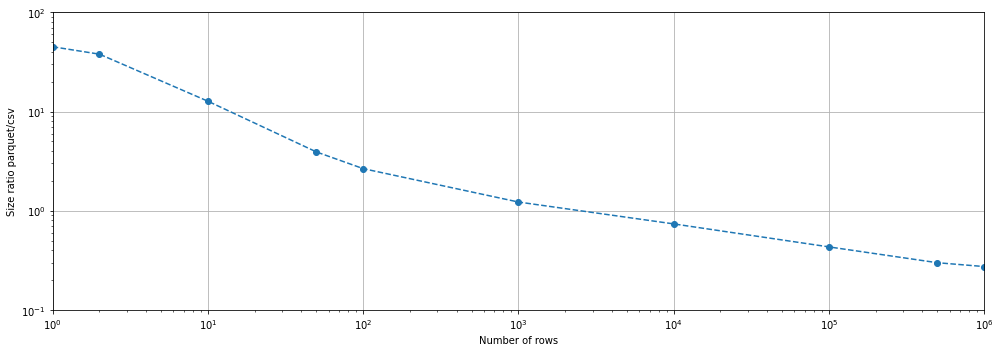

In [14]:
with open('../data/name_size_ratio.json', "r") as f:
    name_size_ratio = json.load(f)

nrows = [1,2,10,50,100,1000, 10000, 100000, 500000, 1000000]
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nrows, name_size_ratio, 'o--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Size ratio parquet/csv')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1,100])
ax.set_xlim([1.0,1e6])
ax.grid(True)


fig.tight_layout()
plt.show()
fig.savefig("../figs/en_size_2.png", dpi=fig.dpi)

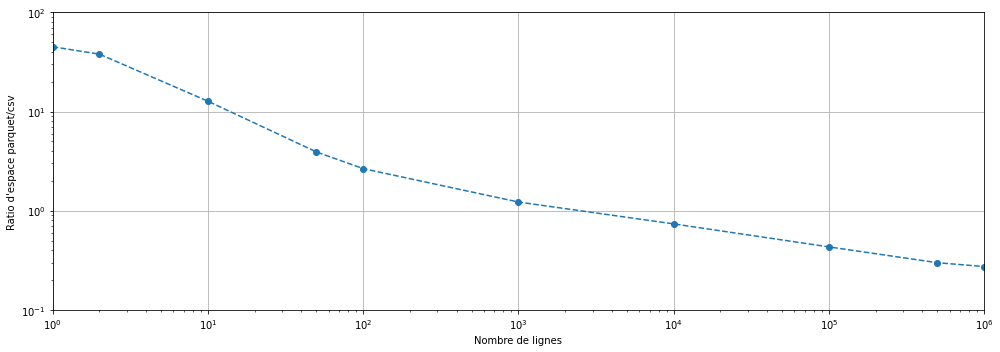

In [15]:
with open('../data/name_size_ratio.json', "r") as f:
    name_size_ratio = json.load(f)

nrows = [1,2,10,50,100,1000, 10000, 100000, 500000, 1000000]
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nrows, name_size_ratio, 'o--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Nombre de lignes')
ax.set_ylabel("Ratio d'espace parquet/csv")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1,100])
ax.set_xlim([1.0,1e6])
ax.grid(True)

fig.tight_layout()
plt.show()
fig.savefig("../figs/fr_size_2.png", dpi=fig.dpi)

2b Names time - MISSING

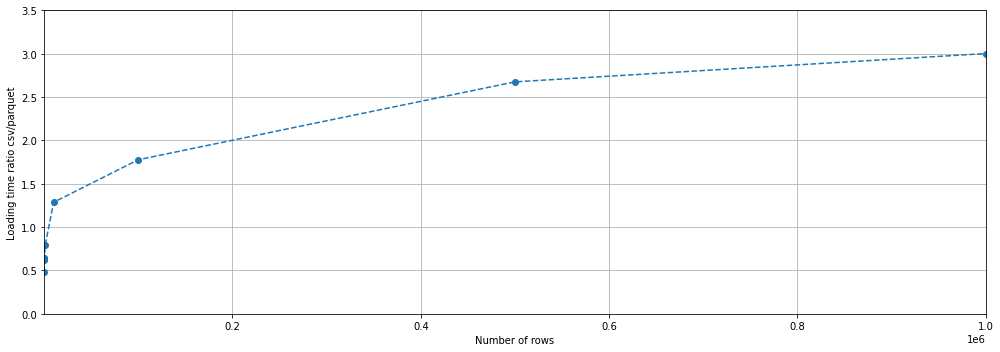

In [23]:
nrows = [1,2,10,50,100,1000, 10000, 100000, 500000, 1000000]

with open('../data/name_csv_speed.json', "r") as f:
    csv_name_speed = json.load(f)
    
with open('../data/parquet_name_speed.json', "r") as f:
    parquet_name_speed = json.load(f)    


fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nrows, np.divide(csv_name_speed, parquet_name_speed), 'o--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Loading time ratio csv/parquet')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0,3.5])
ax.set_xlim([1,1e6])
ax.grid(True)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()
fig.savefig("../figs/en_time_ratio_2.png", dpi=fig.dpi)

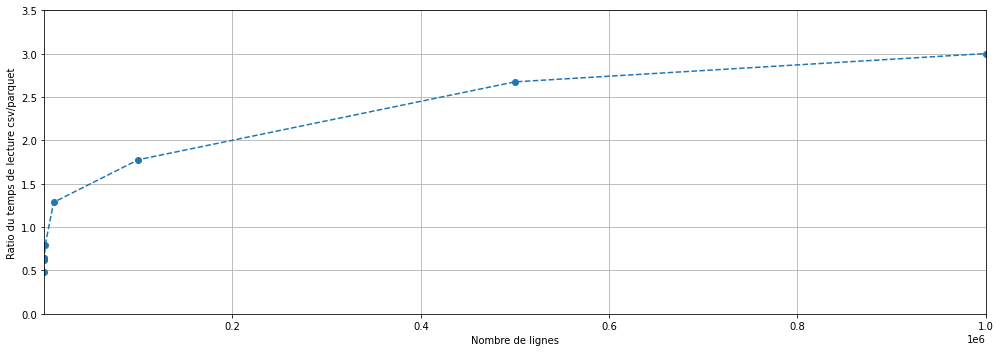

In [24]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nrows, np.divide(csv_name_speed, parquet_name_speed), 'o--')
ax.set_xlabel('Nombre de lignes')
ax.set_ylabel('Ratio du temps de lecture csv/parquet')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0,3.5])
ax.set_xlim([1,1e6])
ax.grid(True)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()
fig.savefig("../figs/fr_time_ratio_2.png", dpi=fig.dpi)


## 3 Int size

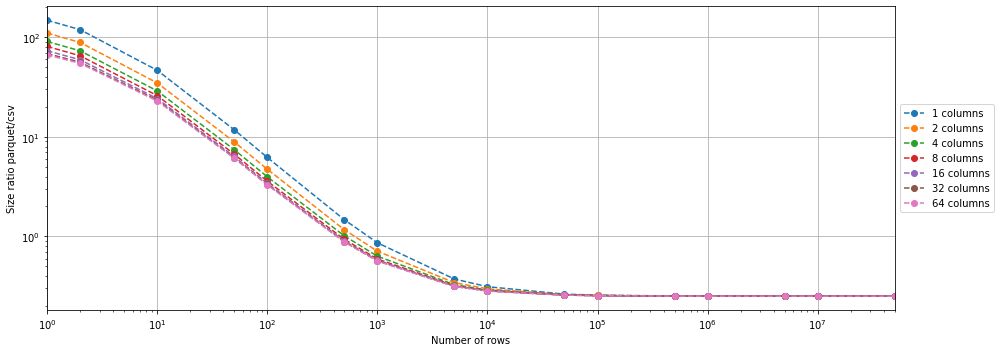

In [16]:
with open('../data/int_size.json', "r") as f:
    size_ratio = json.load(f)


ncols = [1,2,4,8,16,32,64]
nrows = [1,2,10,50,100,500,1000, 5000, 10000, 50000, 100000, 500000,1000000, 5000000, 10000000, 50000000]
fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, size_ratio[f'{c}'], 'o--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Size ratio parquet/csv')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0,5e7])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
fig.savefig("../figs/en_size_3.png", dpi=fig.dpi)

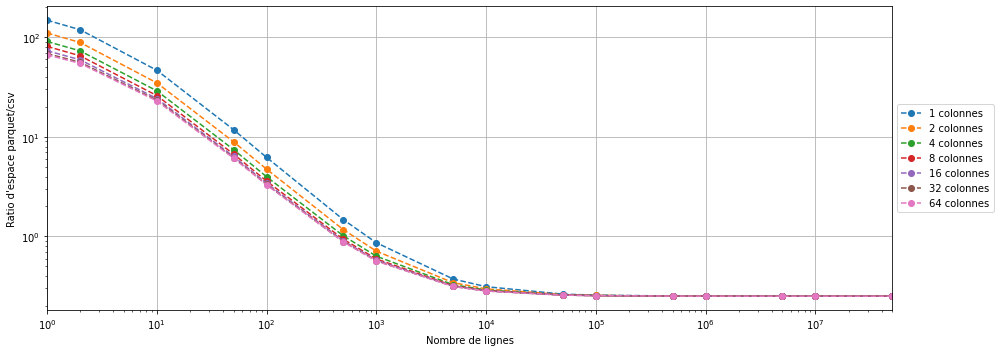

In [17]:
with open('../data/int_size.json', "r") as f:
    size_ratio = json.load(f)


ncols = [1,2,4,8,16,32,64]
nrows = [1,2,10,50,100,500,1000, 5000, 10000, 50000, 100000, 500000,1000000, 5000000, 10000000, 50000000]
fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, size_ratio[f'{c}'], 'o--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Nombre de lignes')
ax.set_ylabel("Ratio d'espace parquet/csv")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0,5e7])
ax.grid(True)
ax.legend([f"{c} colonnes" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
fig.savefig("../figs/fr_size_3.png", dpi=fig.dpi)